# Super Store Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [1]:
file_path1 = '.Data/Sample_Superstore.csv'

In [278]:
df = pd.read_csv(file_path1, encoding = 'latin1')

# Data Preprocessing

In [279]:
df['Discount'] = df['Discount'].replace(np.nan, 0)
df = df.drop('Row ID', axis = 1)

In [280]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = 'mixed')

# Format columns to desired date format
df['Order Date'] = df['Order Date'].dt.strftime('%m/%d/%Y')
df['Ship Date'] = df['Ship Date'].dt.strftime('%m/%d/%Y')

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [281]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [282]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [283]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [284]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Pearson Correlation

In [285]:
discount = df['Discount']
sale = df['Sales']
corr, _ = pearsonr(sale, discount)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.028


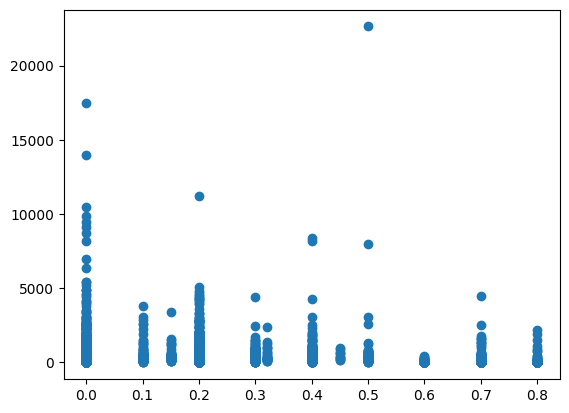

In [286]:
plt.scatter(discount, sale)
plt.show()

In [287]:
profit = df['Profit']
sale = df['Sales']
corr, _ = pearsonr(sale, profit)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.479


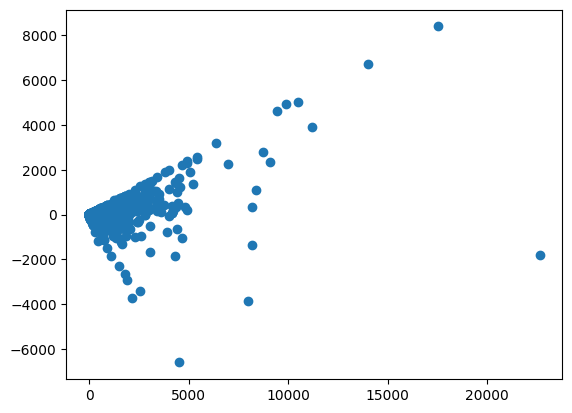

In [288]:
plt.scatter(sale, profit)
plt.show()

##### There is no correlation between Discount and Sales

##### Profit and Sales and positive correlation. This means that, in general, as Sales increase, Profit tends to increase as well. However, the relationship is not perfectly linear.
##### There are some extreme points with very high sales but moderate or low profits. These could represent scenarios where high revenue did not translate into high profitability, possibly due to high costs.

# Sales and Profit By Year

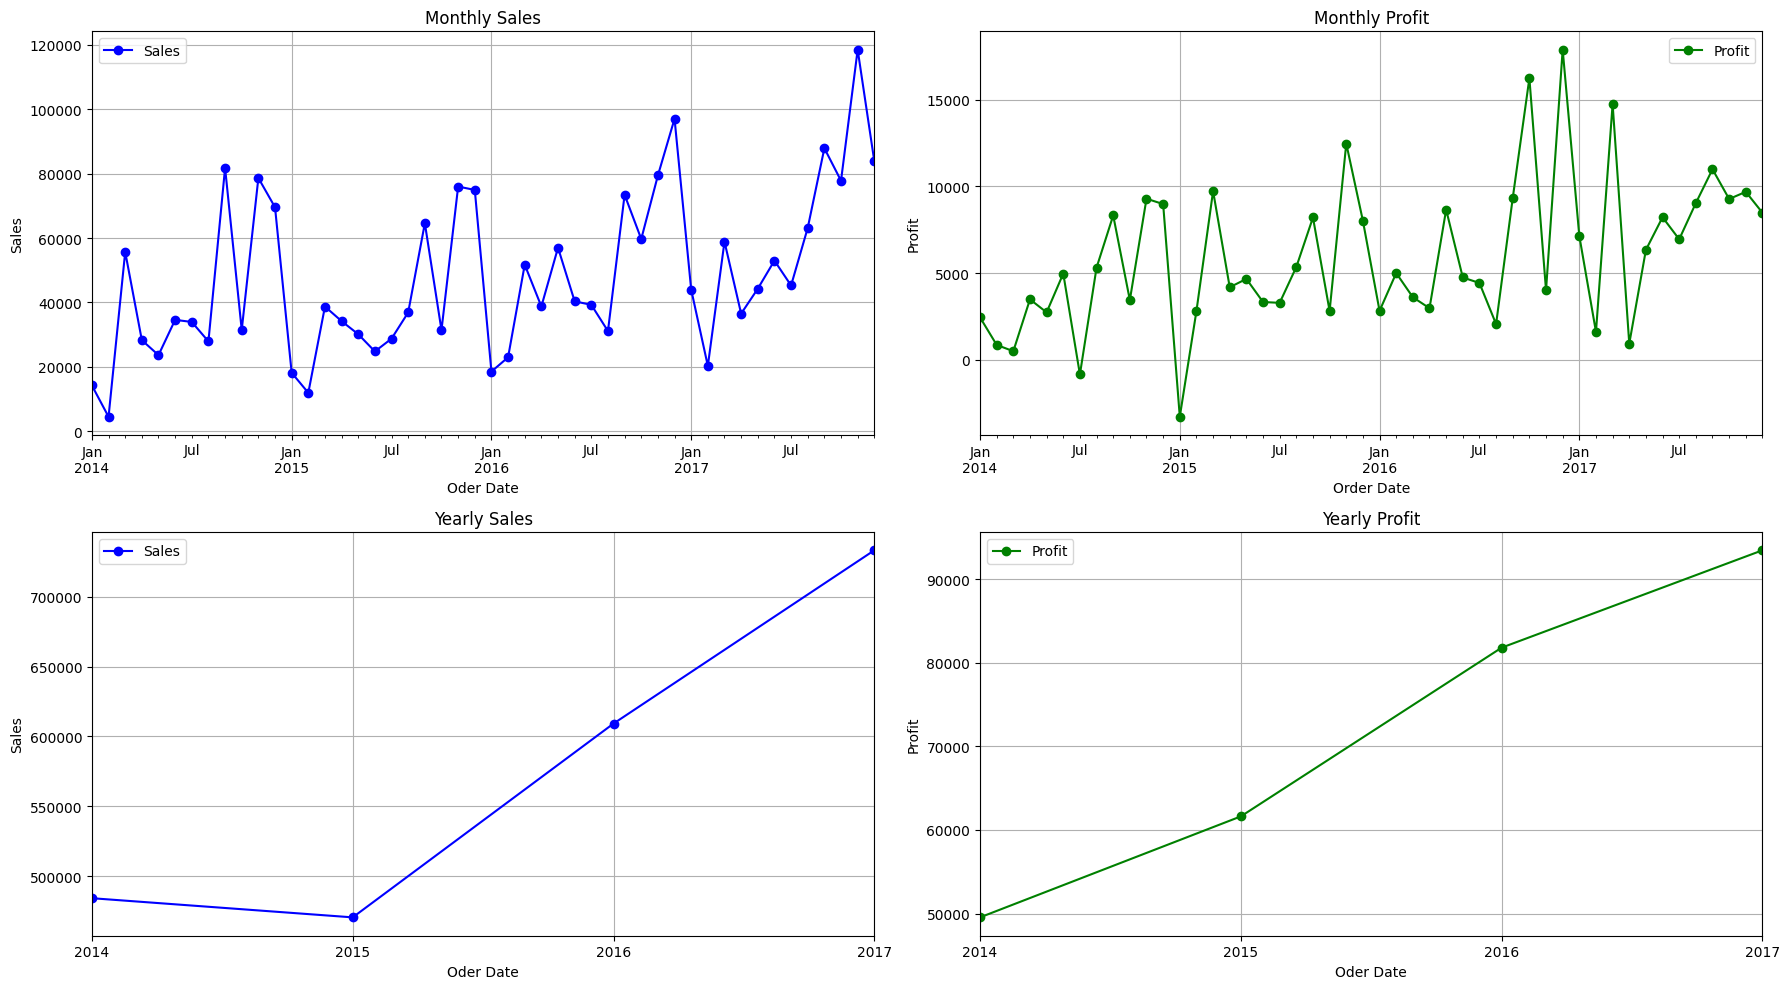

In [289]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_profit = df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum()

yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()
yearly_profit = df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum()



plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='blue')
plt.xlabel('Oder Date')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.legend()
plt.grid()


plt.subplot(2, 2, 2)
monthly_profit.plot(kind='line', marker='o', title='Monthly Profit Trend', color='green')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.title('Monthly Profit')
plt.legend()
plt.grid()


plt.subplot(2, 2, 3)
yearly_sales.plot(kind='line', marker='o', title='Yearly Sales Trend', color='blue')
plt.xlabel('Oder Date')
plt.ylabel('Sales')
plt.title('Yearly Sales')
plt.legend()
plt.grid()


plt.subplot(2, 2, 4)
yearly_profit.plot(kind='line', marker='o', title='Yearly Profit Trend', color='green')
plt.xlabel('Oder Date')
plt.ylabel('Profit')
plt.title('Yearly Profit')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

##### The Sale and Profit is increasing overtime.

# Sales and Profit By Region

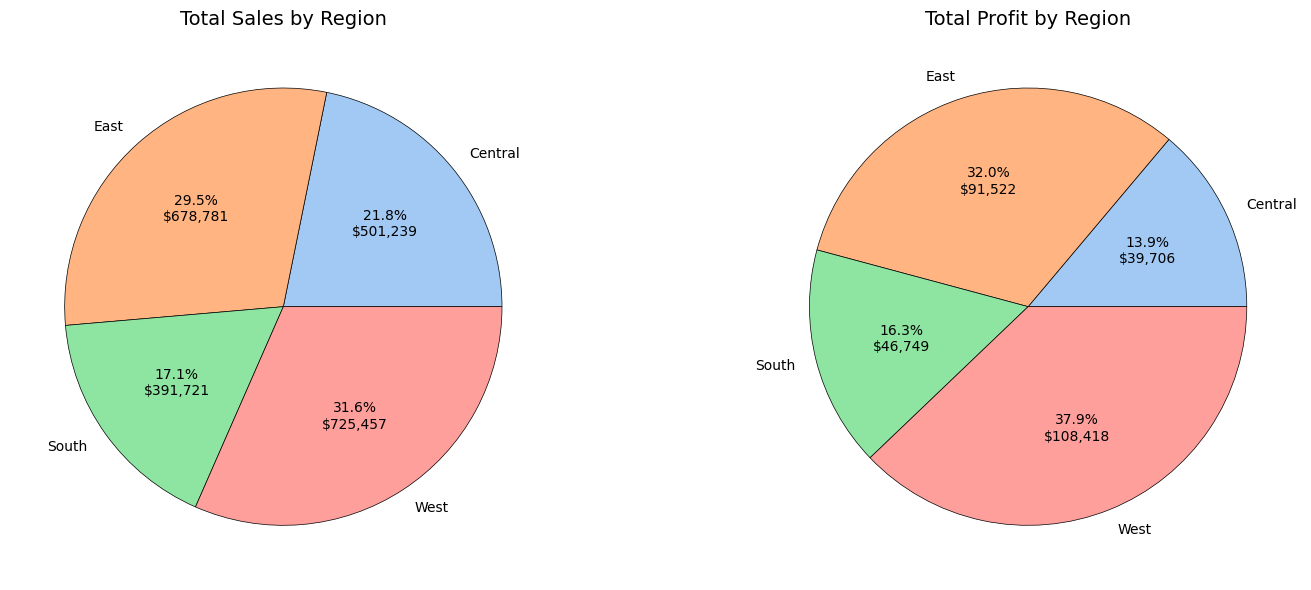

In [328]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
salesByRegion = df.groupby('Region')['Sales'].sum()
plt.pie(salesByRegion, labels = salesByRegion.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct * salesByRegion.sum() / 100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Total Sales by Region", fontdict={"fontsize":14})

plt.subplot(1,2,2)
profitByRegion = df.groupby('Region')['Profit'].sum()
plt.pie(profitByRegion, labels = profitByRegion.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct*profitByRegion.sum()/100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Total Profit by Region", fontdict={"fontsize":14})

plt.tight_layout()
plt.show()

# Analysis by State and City

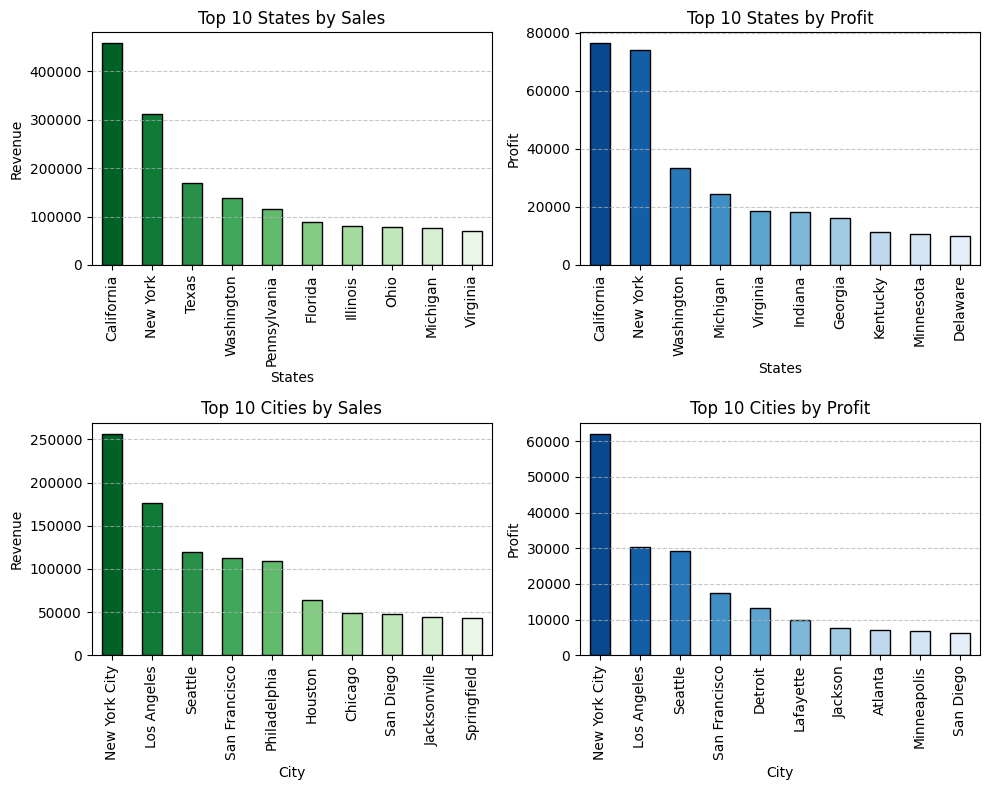

In [307]:
salesByState = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
profitByState = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

salesByCity = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
profitByCity = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
salesByState.plot(kind = 'bar', color = sns.color_palette('Greens_r', 10), edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=10) 
plt.ylabel("Revenue",fontsize=10) 
plt.title('Top 10 States by Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplot(2,2,2)
profitByState.plot(kind = 'bar', color = sns.color_palette('Blues_r', 10), edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=10) 
plt.ylabel("Profit",fontsize=10) 
plt.title('Top 10 States by Profit', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2,2,3)
salesByCity.plot(kind = 'bar', color = sns.color_palette('Greens_r', 10), edgecolor='black', linewidth = 1)
plt.xlabel("City",fontsize=10) 
plt.ylabel("Revenue",fontsize=10) 
plt.title('Top 10 Cities by Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2,2,4)
profitByCity.plot(kind = 'bar', color = sns.color_palette('Blues_r', 10), edgecolor='black', linewidth = 1)
plt.xlabel("City",fontsize=10) 
plt.ylabel("Profit",fontsize=10) 
plt.title('Top 10 Cities by Profit', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

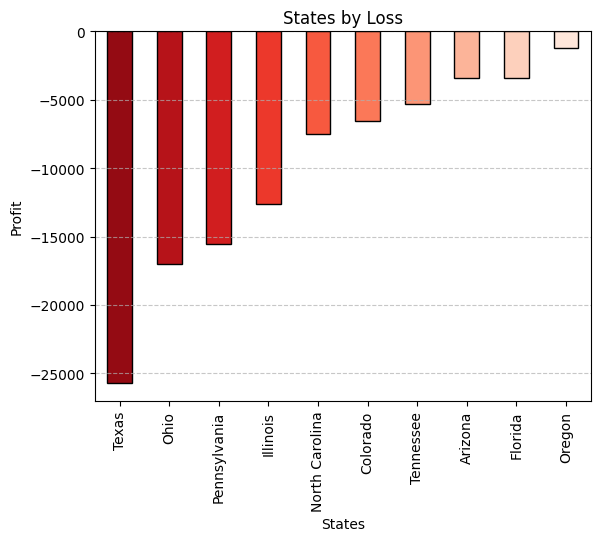

In [308]:
lossByState = df.groupby('State')['Profit'].sum().sort_values(ascending = True).head(10)

lossByState.plot(kind = 'bar', color = sns.color_palette('Reds_r', 10), edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=10) 
plt.ylabel("Profit",fontsize=10) 
plt.title('States by Loss', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Two important states are New York and California. New York is more profitable than California.
##### An important finding here is that some of the states where this company is making most of their sales is actually bringing down the profit that this company is making.
##### Texas for instace, which is their 3rd highest segment in terms of sales, is actually contributing to more than 1/4 of the loss that the company is making on it's sales.

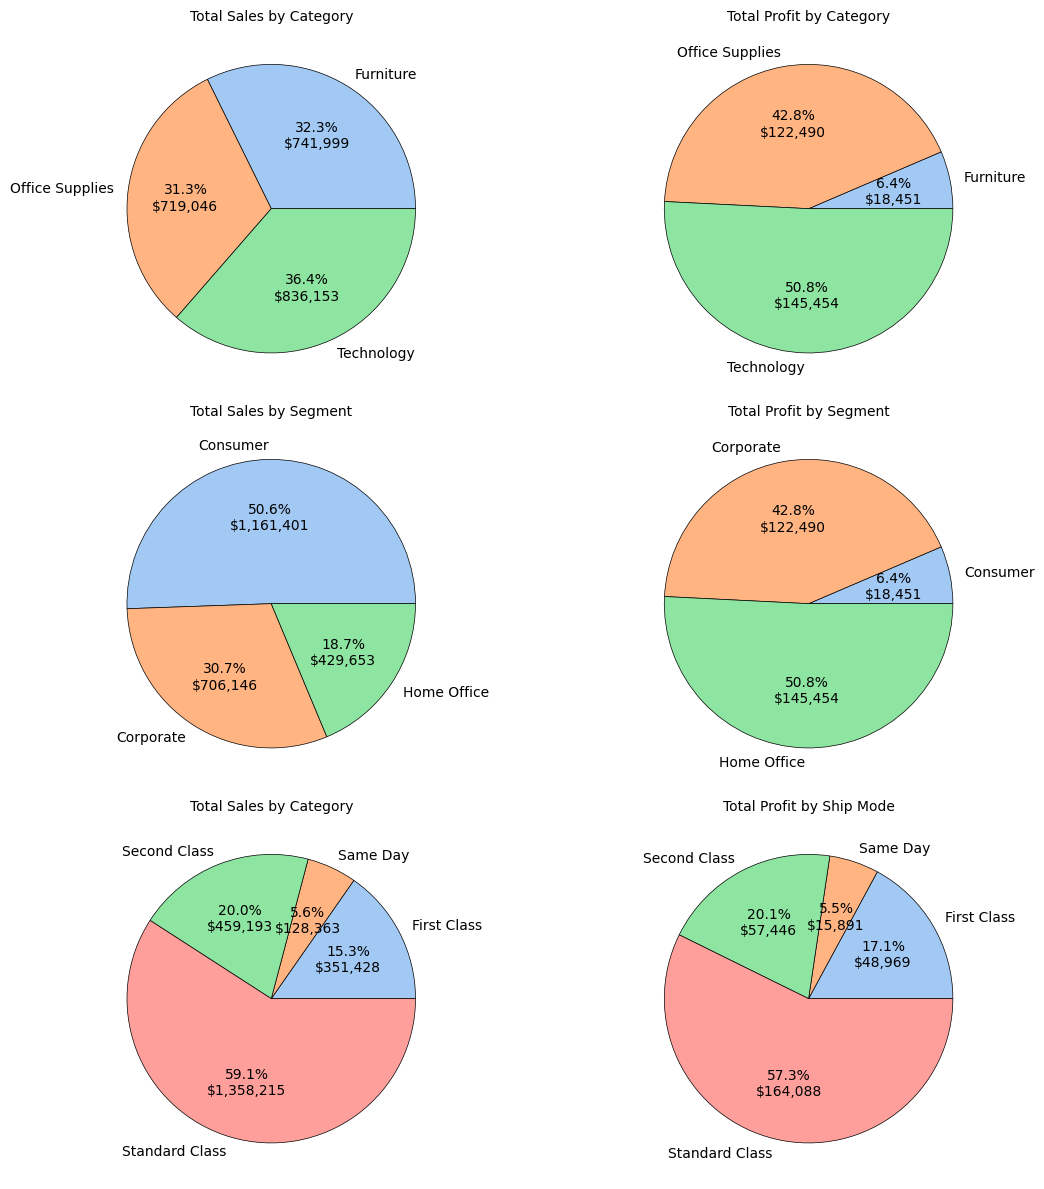

In [327]:
plt.figure(figsize=(12, 12))

plt.subplot(3,2,1)
salesByCategory = df.groupby('Category')['Sales'].sum()
plt.pie(salesByCategory, labels = salesByCategory.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct * salesByCategory.sum() / 100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5} )
plt.title("Total Sales by Category", fontdict={"fontsize":10})

plt.subplot(3,2,2)
profitByCategory = df.groupby('Category')['Profit'].sum()
plt.pie(profitByCategory, labels = profitByCategory.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct*profitByCategory.sum()/100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Total Profit by Category", fontdict={"fontsize":10})

plt.subplot(3,2,3)
salesBySegment = df.groupby('Segment')['Sales'].sum()
plt.pie(salesBySegment, labels = salesBySegment.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct * salesBySegment.sum() / 100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Total Sales by Segment", fontdict={"fontsize":10})

plt.subplot(3,2,4)
profitBySegment = df.groupby('Segment')['Profit'].sum()
plt.pie(profitByCategory, labels = profitBySegment.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct*profitBySegment.sum()/100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Total Profit by Segment", fontdict={"fontsize":10})

plt.subplot(3,2,5)
salesByMode = df.groupby('Ship Mode')['Sales'].sum()
plt.pie(salesByMode, labels = salesByMode.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct * salesByMode.sum() / 100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Total Sales by Category", fontdict={"fontsize":10})

plt.subplot(3,2,6)
profitByMode = df.groupby('Ship Mode')['Profit'].sum()
plt.pie(profitByMode, labels = profitByMode.index, colors = sns.color_palette('pastel'), autopct=lambda pct: f'{pct:.1f}%\n${int(pct*profitByMode.sum()/100):,}', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Total Profit by Ship Mode", fontdict={"fontsize":10})



plt.tight_layout()
plt.show()

##### Technology Category returns huge profit where as although sales of furniture is high but the profit margin is less.

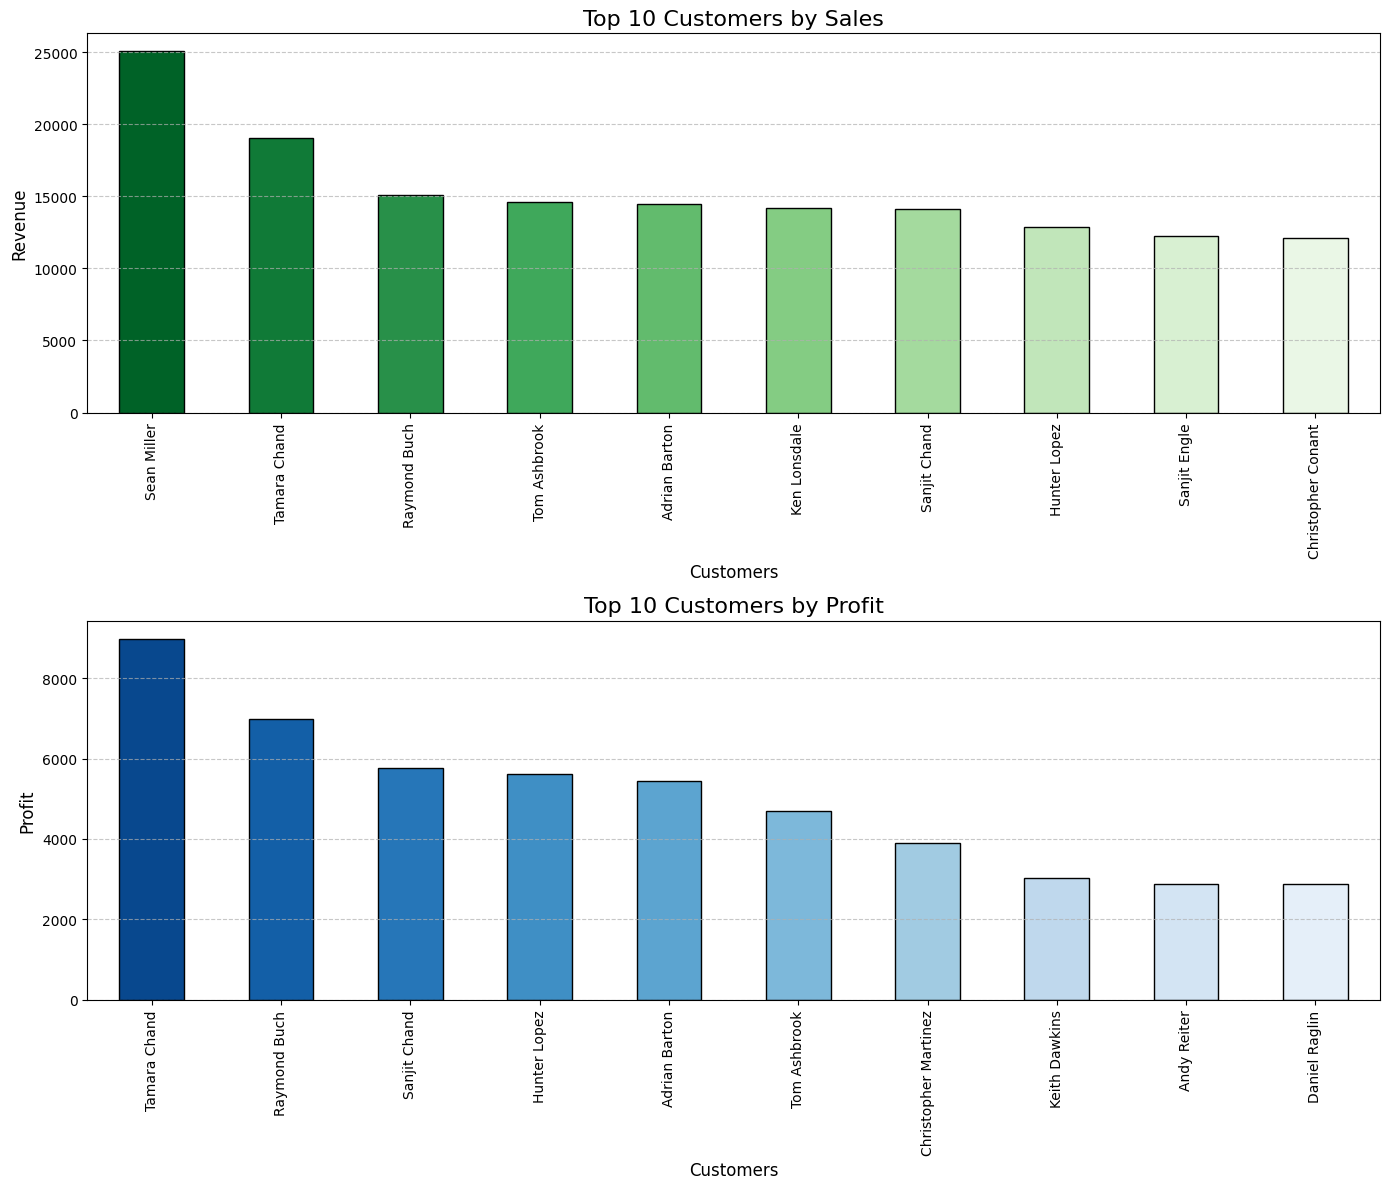

In [310]:
salesByCustomer = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
profitByCustomer = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
salesByCustomer.plot(kind = 'bar', color = sns.color_palette('Greens_r', 10), edgecolor='black', linewidth = 1)
plt.xlabel("Customers",fontsize=12) 
plt.ylabel("Revenue",fontsize=12) 
plt.title('Top 10 Customers by Sales', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2,1,2)
profitByCustomer.plot(kind = 'bar', color = sns.color_palette('Blues_r', 10), edgecolor='black', linewidth = 1)
plt.xlabel("Customers",fontsize=12) 
plt.ylabel("Profit",fontsize=12) 
plt.title('Top 10 Customers by Profit', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# Cumulative Curve

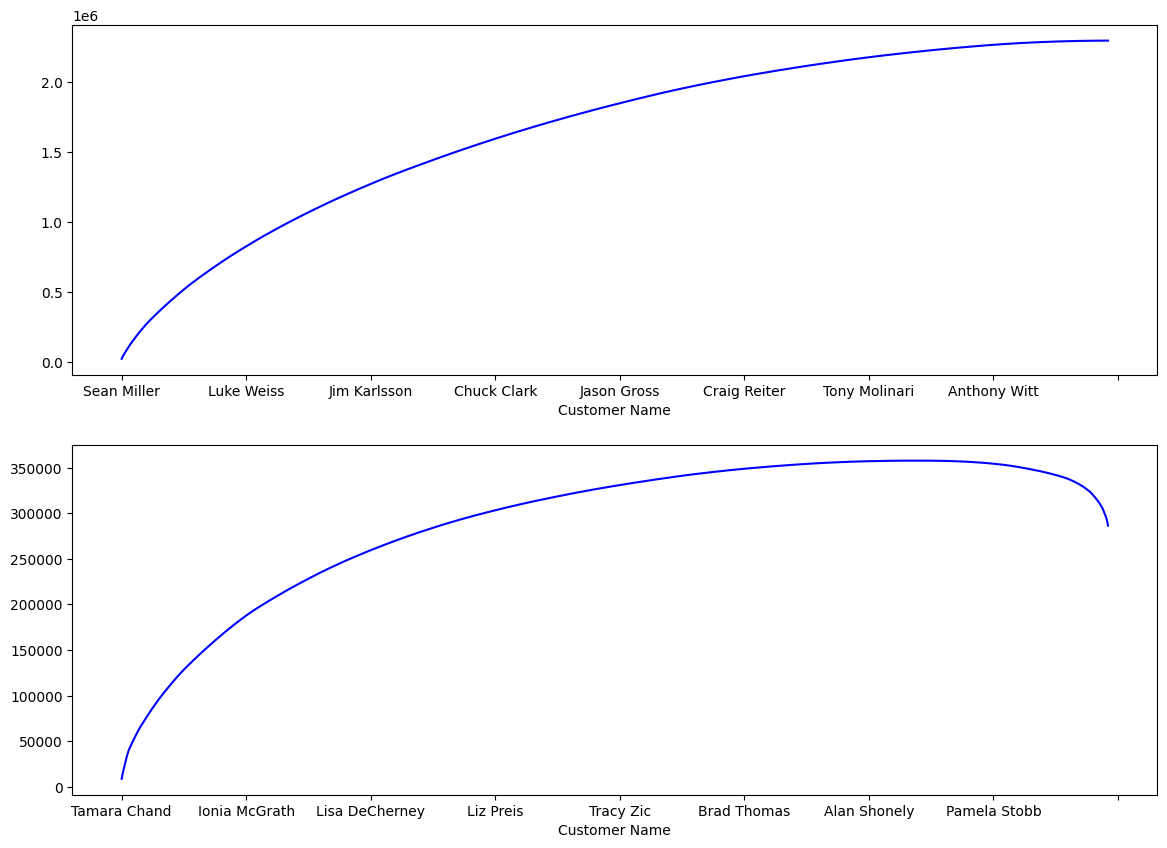

In [237]:
plt.figure(figsize=(14, 10))

plt.subplot(2,1,1)
customerSales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).cumsum().plot(color='blue')


plt.subplot(2,1,2)
customerProfit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).cumsum().plot(color='blue');

# Parento Principle to Customers Sales and Profit

In [316]:
df_sale = pd.DataFrame(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False))
df_sale.quantile(0.7, interpolation='higher')

Sales    3288.11
Name: 0.7, dtype: float64

In [317]:
df_sale[df_sale['Sales']>=3288.11].sum()/df['Sales'].sum()

Sales    0.609223
dtype: float64

In [318]:
df_profit = pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))
df_profit.quantile(0.7, interpolation= 'higher')

Profit    463.269
Name: 0.7, dtype: float64

In [319]:
df_profit[df_profit['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

##### Top 30% of cuatomers occupy 60% of sales
##### Top 30% occupy 97% of Profit. It means that how we can manage top 30% profit customers is very important.

# Texas State Analysis

In [273]:
df_texas = df[df['State'] == 'Texas']

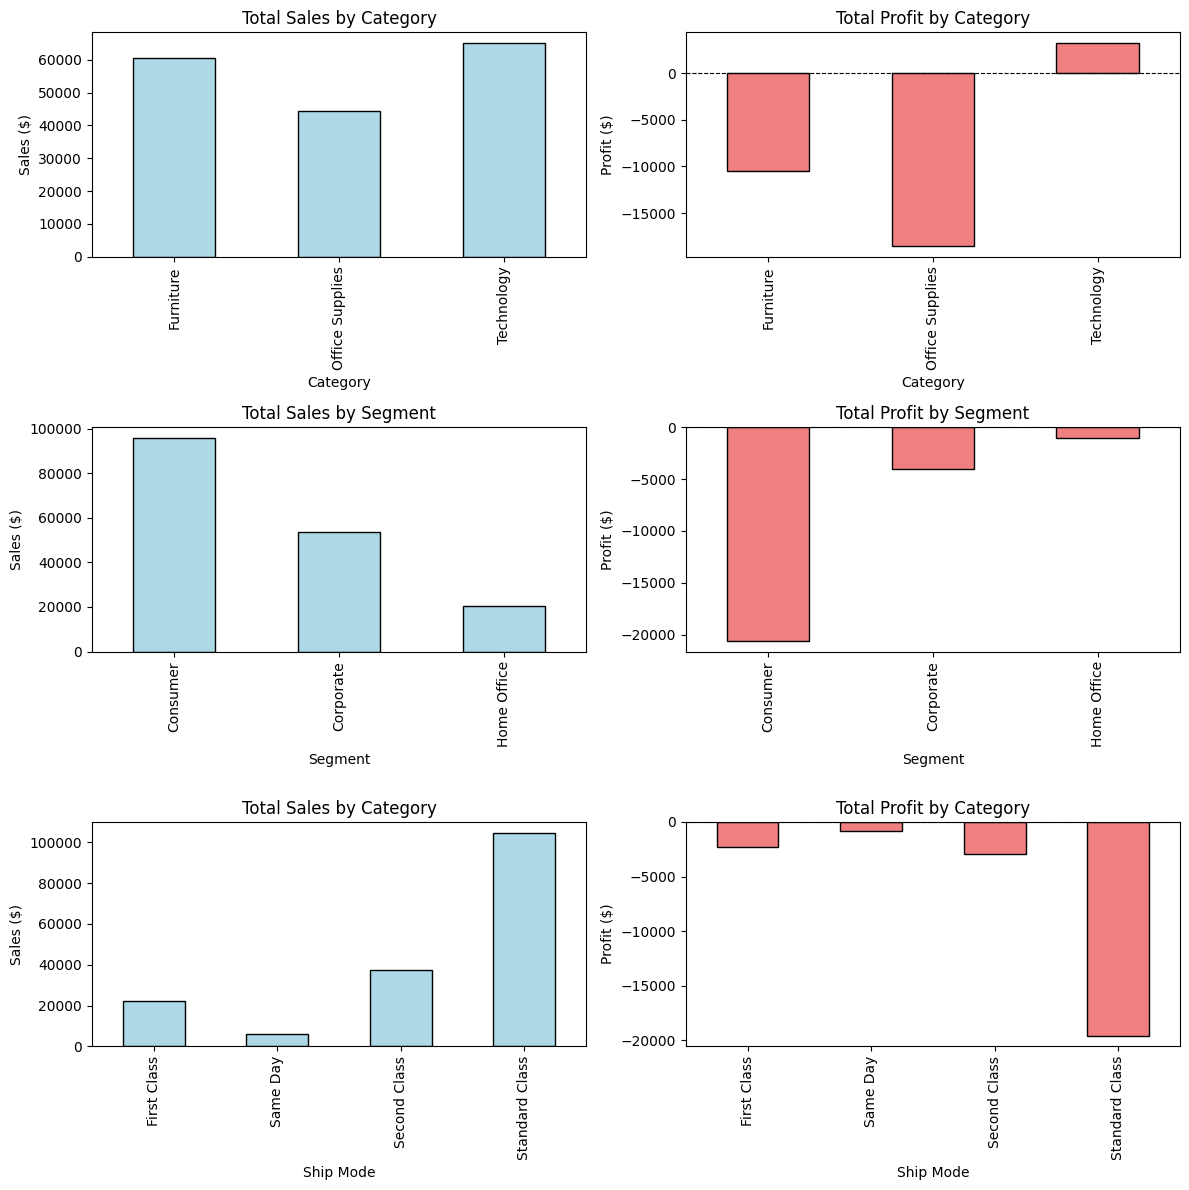

In [313]:
salesByCategory = df_texas.groupby('Category')['Sales'].sum()
profitByCategory = df_texas.groupby('Category')['Profit'].sum()
salesBySegment = df_texas.groupby('Segment')['Sales'].sum()
profitBySegment = df_texas.groupby('Segment')['Profit'].sum()
salesByMode = df_texas.groupby('Ship Mode')['Sales'].sum()
profitByMode = df_texas.groupby('Ship Mode')['Profit'].sum()

plt.figure(figsize=(12, 12))

# Sales by Category
plt.subplot(3, 2, 1)
salesByCategory.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')

# Profit by Category
plt.subplot(3, 2, 2)
profitByCategory.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit ($)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Sales by Segment
plt.subplot(3, 2, 3)
salesBySegment.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales ($)')

# Profit by Segment
plt.subplot(3, 2, 4)
profitBySegment.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit ($)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Sales by Ship Mode
plt.subplot(3, 2, 5)
salesByMode.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Sales by Category')
plt.xlabel('Ship Mode')
plt.ylabel('Sales ($)')

# Profit by Ship Mode
plt.subplot(3, 2, 6)
profitByMode.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Total Profit by Category')
plt.xlabel('Ship Mode')
plt.ylabel('Profit ($)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')




plt.tight_layout()
plt.show()

##### Technology and Home Office have on average a high profit margin, while Furniture are being sold at low margin or even at a loss for some it's sub-categories.
##### The Consumer segment is driving most of the Superstore's sales and across all segments Technology is contributing the most to revenue.
##### Over 50% of their profit is being made in California and New York. This makes this store quite geographically dependent on keeping up their sales here.
##### Their sales in Texas (which is their 3rd highest state in sales) is on aggregate making a loss.

#### Based on this, some actions that the Superstore can take is for instance:
##### 1. Stop selling to certain states where they on aggregate are making a loss.
##### The loss can be attributed to the types of items that are being sold to the customers in this state or that shipment costs to certain areas are driving their profits down.
##### 2. Change prices of non-profitable products
##### More analysis should be done on non-profitable products. Few actions like changing prices or customer basket analysis might help.